### Individual Homework

#### Enter your name here:

## Santiago Andrés Sierra Ibáñez

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Analysis of movies IMDB dataset**

We will look at a ***subset*** sample of movies, taken from the [Kaggle IMDB 5000 movie dataset](https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset)

In [15]:
movies = pd.read_csv('../Data/movies.csv')
movies

,title,genre,director,year,duration,gross,budget,cast_facebook_likes,votes,reviews,rating
0,Avatar,Action,James Cameron,2009,178,760505847,237000000,4834,886204,3777,7.9
1,Titanic,Drama,James Cameron,1997,194,658672302,200000000,45223,793059,2843,7.7
2,Jurassic World,Action,Colin Trevorrow,2015,124,652177271,150000000,8458,418214,1934,7.0
3,The Avengers,Action,Joss Whedon,2012,173,623279547,220000000,87697,995415,2425,8.1
4,The Dark Knight,Action,Christopher Nolan,2008,152,533316061,185000000,57802,1676169,5312,9.0
...,...,...,...,...,...,...,...,...,...,...,...
2956,Locker 13,Thriller,Bruce Dellis,2014,95,2468,300000,2048,241,15,4.8
2957,The Ghastly Love of Johnny X,Comedy,Paul Bunnell,2012,106,2436,2000000,1611,344,113,5.7
2958,Detention of the Dead,Comedy,Alex Craig Mann,2012,87,1332,500000,2251,2038,49,4.6
2959,The Trials of Darryl Hunt,Crime,Ricki Stern,2006,106,1111,200000,2,771,21,7.7


In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2961 entries, 0 to 2960
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                2961 non-null   object 
 1   genre                2961 non-null   object 
 2   director             2961 non-null   object 
 3   year                 2961 non-null   int64  
 4   duration             2961 non-null   int64  
 5   gross                2961 non-null   int64  
 6   budget               2961 non-null   int64  
 7   cast_facebook_likes  2961 non-null   int64  
 8   votes                2961 non-null   int64  
 9   reviews              2961 non-null   int64  
 10  rating               2961 non-null   float64
dtypes: float64(1), int64(7), object(3)
memory usage: 254.6+ KB


In [17]:
movies.describe()

,year,duration,gross,budget,cast_facebook_likes,votes,reviews,rating
count,2961.000000,2961.00000,2.961000e+03,2.961000e+03,2961.000000,2.961000e+03,2961.000000,2961.000000
mean,2002.901385,109.64539,5.809040e+07,4.061938e+07,12393.760892,1.093075e+05,503.305302,6.389227
std,9.946227,22.17132,7.246962e+07,4.368201e+07,20530.107207,1.581439e+05,493.736710,1.051625
min,1920.000000,37.00000,7.030000e+02,2.180000e+02,0.000000,5.000000e+00,2.000000,1.600000
25%,1999.000000,95.00000,1.227681e+07,1.100000e+07,2241.000000,1.991800e+04,199.000000,5.800000
50%,2004.000000,106.00000,3.470323e+07,2.600000e+07,4604.000000,5.574900e+04,364.000000,6.500000
75%,2010.000000,119.00000,7.559029e+07,5.500000e+07,16926.000000,1.333480e+05,631.000000,7.100000
max,2016.000000,330.00000,7.605058e+08,3.000000e+08,656730.000000,1.689764e+06,5312.000000,9.300000


Besides the obvious variables of `title`, `genre`, `director`, `year`, and `duration`, the rest of the variables are as follows:

-   `gross` : The gross earnings in the US box office, not adjusted for inflation
-   `budget`: The movie's budget
-   `cast_facebook_likes`: the number of facebook likes cast memebrs received
-   `votes`: the number of people who voted for (or rated) the movie in IMDB
-   `reviews`: the number of reviews for that movie
-   `rating`: IMDB average rating

**Produce a table with the count of movies by genre, ranked in descending order**


In [18]:
movies_by_genre = (movies
                    .groupby("genre")
                    .agg(
                        count = ("genre","count")
                    )
                    .sort_values(by="count", ascending=False)
                )
movies_by_genre

,count
genre,
Comedy,848
Action,738
Drama,498
Adventure,288
Crime,202
Biography,135
Horror,131
Animation,35
Fantasy,28


In [19]:
movies.genre.value_counts()

genre
Comedy         848
Action         738
Drama          498
Adventure      288
Crime          202
Biography      135
Horror         131
Animation       35
Fantasy         28
Documentary     25
Mystery         16
Sci-Fi           7
Family           3
Musical          2
Romance          2
Western          2
Thriller         1
Name: count, dtype: int64

**Produce a table with the average gross earning and budget (`gross` and `budget`) by genre. Calculate a variable `return_on_budget` which shows how many \$ did a movie make at the box office for each \$ of its budget. Ranked genres by this `return_on_budget` in descending order**

In [20]:
avg_gross_earning_by_genre = (movies
                                .assign(
                                    return_on_budget = movies["gross"] / movies["budget"]
                                )
                                .groupby("genre", dropna=False)
                                .agg(
                                    average_gross_earnings = ("gross","mean"),
                                    average_budget = ("budget","mean"),
                                    average_return_on_budget = ("return_on_budget","mean")
                                )
                                .reset_index()
                                .sort_values(by="average_return_on_budget", ascending=False)
                            )

avg_gross_earning_by_genre

,genre,average_gross_earnings,average_budget,average_return_on_budget
10,Horror,3.771374e+07,1.350492e+07,88.304785
3,Biography,4.520181e+07,2.854370e+07,22.280597
11,Musical,9.208400e+07,3.189500e+06,18.817819
8,Family,1.491605e+08,1.483333e+07,14.076490
6,Documentary,1.735397e+07,5.887852e+06,8.698550
16,Western,2.082188e+07,3.465000e+06,7.062800
9,Fantasy,4.240884e+07,1.758214e+07,6.681969
2,Animation,9.843379e+07,6.170143e+07,5.009095
4,Comedy,4.263055e+07,2.444632e+07,3.713990
12,Mystery,6.753302e+07,3.921875e+07,3.269397


**Produce a table that shows the top 15 directors who have created the highest gross revenue in the box office. Don't just show the total gross amount, but also the mean, median, and standard deviation per director**

In [21]:
top_15_directors = (movies
                    .groupby("director", dropna=False)
                    .agg(
                        total_revenue = ("gross","sum"),
                        avg_revenue = ("gross","mean"),
                        median_revenue = ("gross","median"),
                        std_revenue = ("gross","std")
                    )
                    .sort_values(by="total_revenue", ascending=False)            
                )

top_15_directors.head(15)

,total_revenue,avg_revenue,median_revenue,std_revenue
director,,,,
Steven Spielberg,4014061704,1.745244e+08,164435221.0,1.014211e+08
Michael Bay,2231242537,1.716340e+08,138396624.0,1.271616e+08
Tim Burton,2071275480,1.294547e+08,76519172.0,1.087269e+08
Sam Raimi,2014600898,2.014601e+08,234903076.0,1.621266e+08
James Cameron,1909725910,3.182877e+08,175562880.5,3.091713e+08
Christopher Nolan,1813227576,2.266534e+08,196667606.5,1.872241e+08
George Lucas,1741418480,3.482837e+08,380262555.0,1.461939e+08
Robert Zemeckis,1619309108,1.245622e+08,100853835.0,9.130028e+07
Clint Eastwood,1378321100,7.254322e+07,46700000.0,7.548741e+07


**Produce a table that describes how ratings are distributed by genre. We don't want just the mean, but also, min, max, median, SD and some kind of a histogram or density graph that visually shows how ratings are distributed.**

In [22]:
rating_by_genre = (movies
                    .groupby("genre", dropna=False)
                    .agg(
                        mean_rating = ("rating","mean"),
                        min_rating = ("rating","min"),
                        max_rating = ("rating","max"),
                        median_rating = ("rating","median"),
                        std_rating = ("rating","std"),
                    )
)

rating_by_genre

,mean_rating,min_rating,max_rating,median_rating,std_rating
genre,,,,,
Action,6.232249,2.1,9.0,6.30,1.030362
Adventure,6.506597,2.3,8.6,6.60,1.093881
Animation,6.651429,4.5,8.0,6.90,0.968131
Biography,7.114074,4.5,8.9,7.20,0.759827
Comedy,6.109670,1.9,8.8,6.20,1.023075
Crime,6.915347,4.8,9.3,6.90,0.849356
Documentary,6.660000,1.6,8.5,7.40,1.766588
Drama,6.731526,2.1,8.8,6.80,0.916993
Family,6.500000,5.7,7.9,5.90,1.216553


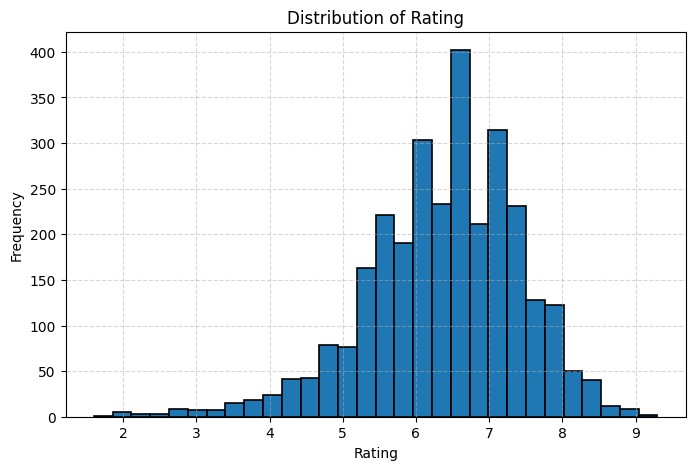

In [23]:
# help (plt.hist)
plt.figure(figsize=(8,5))
plt.hist(x=movies["rating"], bins=30, edgecolor='black', linewidth=1.2)
plt.title("Distribution of Rating")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
plt.show()


**Challenge - Produce a table of your own choosing, something you think is important/interesting to have data for, justify your result by writting a 2 sentence explanation/interpretation of the result.**

In [24]:
movies


,title,genre,director,year,duration,gross,budget,cast_facebook_likes,votes,reviews,rating
0,Avatar,Action,James Cameron,2009,178,760505847,237000000,4834,886204,3777,7.9
1,Titanic,Drama,James Cameron,1997,194,658672302,200000000,45223,793059,2843,7.7
2,Jurassic World,Action,Colin Trevorrow,2015,124,652177271,150000000,8458,418214,1934,7.0
3,The Avengers,Action,Joss Whedon,2012,173,623279547,220000000,87697,995415,2425,8.1
4,The Dark Knight,Action,Christopher Nolan,2008,152,533316061,185000000,57802,1676169,5312,9.0
...,...,...,...,...,...,...,...,...,...,...,...
2956,Locker 13,Thriller,Bruce Dellis,2014,95,2468,300000,2048,241,15,4.8
2957,The Ghastly Love of Johnny X,Comedy,Paul Bunnell,2012,106,2436,2000000,1611,344,113,5.7
2958,Detention of the Dead,Comedy,Alex Craig Mann,2012,87,1332,500000,2251,2038,49,4.6
2959,The Trials of Darryl Hunt,Crime,Ricki Stern,2006,106,1111,200000,2,771,21,7.7


In [32]:
own_table = (movies
                .groupby("director", dropna=False)
                .agg(
                    avg_votes = ("votes","mean")
                )
                .sort_values(by="avg_votes", ascending=False)
                .reset_index()
)

own_table.head(10)

,director,avg_votes
0,Christopher Nolan,1.013285e+06
1,Irvin Kershner,8.377590e+05
2,Tony Kaye,7.824370e+05
3,Quentin Tarantino,6.988325e+05
4,Frank Darabont,6.844700e+05
5,Richard Marquand,6.818570e+05
6,Peter Jackson,6.099854e+05
7,Joss Whedon,5.668943e+05
8,Lee Unkrich,5.448840e+05
9,Andrew Stanton,5.411743e+05


#### Use visualisation to answer the following questions

**Examine the relationship between `gross` and `cast_facebook_likes`. Produce a scatterplot and write one sentence discussing whether the number of facebook likes that the cast has received is likely to be a good predictor of how much money a movie will make at the box office. What variable are you going to map to the Y- and X- axes?**

**Examine the relationship between `gross` and `budget`. Produce a scatterplot and write one sentence discussing whether budget is likely to be a good predictor of how much money a movie will make at the box office.**

**Examine the relationship between `gross` and `rating`. Produce a scatterplot, faceted by `genre` and discuss whether IMDB ratings are likely to be a good predictor of how much money a movie will make at the box office. Is there anything strange in this dataset?**

**Challenge - Produce a visualisation of your choosing, something you think is important to explore/investigate visually. Do make it a comprehensive graph and not a single histogram or density plot. Make it publication ready, label your axes, give it a title, choose colouring options, appropirately formatted text etc.**

### Deliverables

Poduce a clean, stand-alone notebook (or HTML export) with:

All tables/plots properly labeled

Brief interpretations where requested

Upload final HTML/Notebook.